# FA & Clustering

## FA


* 속성값들
* 클러스터링 대상

In [2]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# 데이터 가져오기

file_dir = '../data/'
file_name = 'result_rdb_internal_4.csv'

internalMetrics_df = pd.read_csv(file_dir+file_name)

In [5]:
# 확인
internalMetrics_df.head()

,redis_version,redis_git_sha1,redis_git_dirty,redis_build_id,redis_mode,os,arch_bits,multiplexing_api,atomicvar_api,gcc_version,...,repl_backlog_first_byte_offset,repl_backlog_histlen,used_cpu_sys,used_cpu_user,used_cpu_sys_children,used_cpu_user_children,cluster_enabled,db0:keys,expires,avg_ttl
0,5.0.2,0,0,24934926e99aa4a4,standalone,Linux 4.15.0-1098-gcp x86_64,64,epoll,atomic-builtin,5.4.0,...,0,0,21.092774,6.039113,0.0,0.0,0,249666,0,0
1,5.0.2,0,0,24934926e99aa4a4,standalone,Linux 4.15.0-1098-gcp x86_64,64,epoll,atomic-builtin,5.4.0,...,0,0,20.643600,6.038766,0.0,0.0,0,249666,0,0
2,5.0.2,0,0,24934926e99aa4a4,standalone,Linux 4.15.0-1098-gcp x86_64,64,epoll,atomic-builtin,5.4.0,...,0,0,20.923632,5.806548,0.0,0.0,0,249666,0,0
3,5.0.2,0,0,24934926e99aa4a4,standalone,Linux 4.15.0-1098-gcp x86_64,64,epoll,atomic-builtin,5.4.0,...,0,0,22.507727,6.583683,0.0,0.0,0,249666,0,0
4,5.0.2,0,0,24934926e99aa4a4,standalone,Linux 4.15.0-1098-gcp x86_64,64,epoll,atomic-builtin,5.4.0,...,0,0,20.708273,5.782973,0.0,0.0,0,249666,0,0


## 변수 선택
### 버전 환경 관련
* redis_version
* redis_builid_id
* os
* gcc_version
* Executable
* config_file
* tcp_port
* run_id
* process_id

In [6]:
# 버전, 환경 관련 변수
var1_noRel = [
    'redis_version', 
    'redis_build_id', 
    'os',
    'gcc_version',
    'executable',
    'config_file',
    'tcp_port',
    'run_id',
    'process_id',
    'master_replid'
]

In [7]:
# 버전, 환경 관련 변수 확인
var1_noRel

['redis_version',
 'redis_build_id',
 'os',
 'gcc_version',
 'executable',
 'config_file',
 'tcp_port',
 'run_id',
 'process_id',
 'master_replid']

In [8]:
# 변수 제거 
internalMetrics_df = internalMetrics_df.drop(columns = var1_noRel, axis=0)

In [9]:
len(internalMetrics_df.columns)

114

In [10]:
# 변수 제거 데이터프레임 확인
internalMetrics_df.head()

,redis_git_sha1,redis_git_dirty,redis_mode,arch_bits,multiplexing_api,atomicvar_api,uptime_in_seconds,uptime_in_days,hz,configured_hz,...,repl_backlog_first_byte_offset,repl_backlog_histlen,used_cpu_sys,used_cpu_user,used_cpu_sys_children,used_cpu_user_children,cluster_enabled,db0:keys,expires,avg_ttl
0,0,0,standalone,64,epoll,atomic-builtin,38,0,30,30,...,0,0,21.092774,6.039113,0.0,0.0,0,249666,0,0
1,0,0,standalone,64,epoll,atomic-builtin,37,0,18,18,...,0,0,20.643600,6.038766,0.0,0.0,0,249666,0,0
2,0,0,standalone,64,epoll,atomic-builtin,38,0,39,39,...,0,0,20.923632,5.806548,0.0,0.0,0,249666,0,0
3,0,0,standalone,64,epoll,atomic-builtin,42,0,6,6,...,0,0,22.507727,6.583683,0.0,0.0,0,249666,0,0
4,0,0,standalone,64,epoll,atomic-builtin,38,0,35,35,...,0,0,20.708273,5.782973,0.0,0.0,0,249666,0,0


### 모두 동일한 값
fa의 경우 모두 동일한 값이 존재하면 실행 시 오류 발생

In [11]:
len(internalMetrics_df.columns)

114

In [12]:
# 모두 동일한 값 가지고 있는 변수 리스트
sameValue_var = []

for metric in internalMetrics_df:
    if len(internalMetrics_df[metric].unique()) == 1:
        sameValue_var.append(metric)

sameValue_var

['redis_git_sha1',
 'redis_git_dirty',
 'redis_mode',
 'arch_bits',
 'multiplexing_api',
 'atomicvar_api',
 'uptime_in_days',
 'connected_clients',
 'client_recent_max_output_buffer',
 'blocked_clients',
 'used_memory_human',
 'used_memory_dataset_perc',
 'total_system_memory',
 'total_system_memory_human',
 'used_memory_lua',
 'used_memory_lua_human',
 'used_memory_scripts',
 'used_memory_scripts_human',
 'number_of_cached_scripts',
 'maxmemory',
 'maxmemory_human',
 'allocator_frag_ratio',
 'mem_not_counted_for_evict',
 'mem_replication_backlog',
 'mem_clients_slaves',
 'mem_clients_normal',
 'mem_aof_buffer',
 'mem_allocator',
 'active_defrag_running',
 'lazyfree_pending_objects',
 'loading',
 'rdb_last_bgsave_status',
 'aof_enabled',
 'aof_rewrite_in_progress',
 'aof_rewrite_scheduled',
 'aof_last_rewrite_time_sec',
 'aof_current_rewrite_time_sec',
 'aof_last_bgrewrite_status',
 'aof_last_write_status',
 'aof_last_cow_size',
 'total_connections_received',
 'total_commands_processed

In [13]:
sameValue_var_update = ['redis_git_sha1',
 'redis_git_dirty',
 'redis_mode',
 'arch_bits',
 'multiplexing_api',
 'atomicvar_api',
 'uptime_in_days',
 'connected_clients',
 'client_recent_max_output_buffer',
 'blocked_clients',
 'used_memory',
 'used_memory_human',
 'used_memory_peak_human',
 'used_memory_peak_perc',
 'used_memory_startup',
 'total_system_memory',
 'total_system_memory_human',
 'used_memory_lua',
 'used_memory_lua_human',
 'used_memory_scripts',
 'used_memory_scripts_human',
 'number_of_cached_scripts',
 'allocator_frag_ratio',
 'mem_not_counted_for_evict',
 'mem_replication_backlog',
 'mem_clients_slaves',
 'mem_aof_buffer',
 'mem_allocator',
 'active_defrag_running',
 'lazyfree_pending_objects',
 'loading',
 'rdb_bgsave_in_progress',
 'rdb_last_bgsave_status',
 'rdb_current_bgsave_time_sec',
 'aof_enabled',
 'aof_rewrite_in_progress',
 'aof_rewrite_scheduled',
 'aof_last_rewrite_time_sec',
 'aof_current_rewrite_time_sec',
 'aof_last_bgrewrite_status',
 'aof_last_write_status',
 'aof_last_cow_size',
 'total_connections_received',
 'total_commands_processed',
 'total_net_input_bytes',
 'rejected_connections',
 'sync_full',
 'sync_partial_ok',
 'sync_partial_err',
 'expired_keys',
 'expired_stale_perc',
 'expired_time_cap_reached_count',
 'evicted_keys',
 'pubsub_channels',
 'pubsub_patterns',
 'migrate_cached_sockets',
 'slave_expires_tracked_keys',
 'active_defrag_hits',
 'active_defrag_misses',
 'active_defrag_key_hits',
 'active_defrag_key_misses',
 'role',
 'connected_slaves',
 'master_replid2',
 'master_repl_offset',
 'second_repl_offset',
 'repl_backlog_active',
 'repl_backlog_size',
 'repl_backlog_first_byte_offset',
 'repl_backlog_histlen',
 'cluster_enabled',
 'db0:keys',
 'expires',
 'avg_ttl']

In [14]:
diff_var = []

for i in range(len(sameValue_var_update)):
    if sameValue_var_update[i] in sameValue_var:
        continue
    diff_var.append(sameValue_var_update[i])
diff_var

['used_memory',
 'used_memory_peak_human',
 'used_memory_peak_perc',
 'used_memory_startup',
 'rdb_bgsave_in_progress',
 'rdb_current_bgsave_time_sec']

In [15]:
def find_var_count(df, count):
    var = []
    
    for metric in df:
        if len(df[metric].unique()) == count:
            var.append(metric)
    return var

len(find_var_count(internalMetrics_df, 2))

4

In [16]:
# 동일 값 변수 제거
internalMetrics_df = internalMetrics_df.drop(columns = sameValue_var, axis = 0)

In [17]:
len(internalMetrics_df.columns)

42

In [18]:
sameValue_var = []
for metric in internalMetrics_df:
    print("{}".format(metric), internalMetrics_df[metric].unique())

uptime_in_seconds [38 37 42 39 40 36 41 46 43 45 35 34]
hz [30 18 39  6 35 27 13  3 19 28  8 37 11 22 17  4 32 24  5 16 36 38 29 14
 21 15 26  7 10 12 20 23  1 31 34  2 25 33  9 40]
configured_hz [30 18 39  6 35 27 13  3 19 28  8 37 11 22 17  4 32 24  5 16 36 38 29 14
 21 15 26  7 10 12 20 23  1 31 34  2 25 33  9 40]
lru_clock [10269216 10269260 10269304 ... 10713463 10713510 10713556]
client_recent_max_input_buffer [2 4]
used_memory [38903296 38902272 38903592 38903488]
used_memory_rss [43397120 43208704 43352064 43245568 43560960 43520000 43515904 43388928
 43290624 43286528 43540480 43294720 43642880 43302912 43565056 43544576
 43425792 43401216 43409408 43282432 43249664 43474944 43429888 43360256
 43372544 43339776 43364352 43253760 43343872 43356160 43483136 43323392
 43524096 43368448 43589632 43491328 43380736 43536384 43618304 43470848
 43421696 43634688 43376640 43626496 43487232 43237376 43495424 43298816
 43507712 43393024 43384832 43548672 43532288 43442176 43511808 435527

In [19]:
len(internalMetrics_df.columns)

42

In [20]:
internalMetrics_df.head()

,uptime_in_seconds,hz,configured_hz,lru_clock,client_recent_max_input_buffer,used_memory,used_memory_rss,used_memory_rss_human,used_memory_peak,used_memory_peak_human,...,total_net_output_bytes,instantaneous_input_kbps,instantaneous_output_kbps,keyspace_hits,keyspace_misses,latest_fork_usec,used_cpu_sys,used_cpu_user,used_cpu_sys_children,used_cpu_user_children
0,38,30,30,10269216,2,38903296,43397120,41.39,38963896,37.16,...,5049038,1077.04,76.71,743,499257,0,21.092774,6.039113,0.0,0.0
1,37,18,18,10269260,2,38903296,43208704,41.21,38963896,37.16,...,5048972,1946.91,138.64,742,499258,0,20.643600,6.038766,0.0,0.0
2,38,39,39,10269304,2,38903296,43352064,41.34,38963896,37.16,...,5049038,1273.88,90.49,743,499257,0,20.923632,5.806548,0.0,0.0
3,42,6,6,10269353,2,38903296,43245568,41.24,38963896,37.16,...,5049038,1308.64,93.12,743,499257,0,22.507727,6.583683,0.0,0.0
4,38,35,35,10269397,2,38903296,43560960,41.54,38963888,37.16,...,5049038,889.35,63.59,743,499257,0,20.708273,5.782973,0.0,0.0


In [21]:
# 변수 개수 확인
len(internalMetrics_df.columns)

42

In [22]:
internalMetrics_df.dtypes

uptime_in_seconds                   int64
hz                                  int64
configured_hz                       int64
lru_clock                           int64
client_recent_max_input_buffer      int64
used_memory                         int64
used_memory_rss                     int64
used_memory_rss_human             float64
used_memory_peak                    int64
used_memory_peak_human            float64
used_memory_peak_perc             float64
used_memory_overhead                int64
used_memory_startup                 int64
used_memory_dataset                 int64
allocator_allocated                 int64
allocator_active                    int64
allocator_resident                  int64
maxmemory_policy                   object
allocator_frag_bytes                int64
allocator_rss_ratio               float64
allocator_rss_bytes                 int64
rss_overhead_ratio                float64
rss_overhead_bytes                 uint64
mem_fragmentation_ratio           

### 범주형 변수 처리

In [23]:
import pandas as pd

In [24]:
internalMetrics_df = pd.get_dummies(internalMetrics_df)
internalMetrics_df.head()

,uptime_in_seconds,hz,configured_hz,lru_clock,client_recent_max_input_buffer,used_memory,used_memory_rss,used_memory_rss_human,used_memory_peak,used_memory_peak_human,...,used_cpu_sys_children,used_cpu_user_children,maxmemory_policy_allkeys-lfu,maxmemory_policy_allkeys-lru,maxmemory_policy_allkeys-random,maxmemory_policy_noeviction,maxmemory_policy_volatile-lfu,maxmemory_policy_volatile-lru,maxmemory_policy_volatile-random,maxmemory_policy_volatile-ttl
0,38,30,30,10269216,2,38903296,43397120,41.39,38963896,37.16,...,0.0,0.0,0,0,0,1,0,0,0,0
1,37,18,18,10269260,2,38903296,43208704,41.21,38963896,37.16,...,0.0,0.0,0,1,0,0,0,0,0,0
2,38,39,39,10269304,2,38903296,43352064,41.34,38963896,37.16,...,0.0,0.0,0,1,0,0,0,0,0,0
3,42,6,6,10269353,2,38903296,43245568,41.24,38963896,37.16,...,0.0,0.0,1,0,0,0,0,0,0,0
4,38,35,35,10269397,2,38903296,43560960,41.54,38963888,37.16,...,0.0,0.0,0,0,0,0,1,0,0,0


## Scaling

In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### standardscaler

In [26]:
std_scaler = StandardScaler()
df = internalMetrics_df.copy()
std_scaler.fit(internalMetrics_df)
internalMetrics_df = std_scaler.transform(internalMetrics_df)


In [27]:
# 표준펴차 확인
internalMetrics_df.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [28]:
internalMetrics_df = pd.DataFrame(internalMetrics_df, columns = df.columns, index = list(df.index.values))


In [29]:
internalMetrics_df.head()

,uptime_in_seconds,hz,configured_hz,lru_clock,client_recent_max_input_buffer,used_memory,used_memory_rss,used_memory_rss_human,used_memory_peak,used_memory_peak_human,...,used_cpu_sys_children,used_cpu_user_children,maxmemory_policy_allkeys-lfu,maxmemory_policy_allkeys-lru,maxmemory_policy_allkeys-random,maxmemory_policy_noeviction,maxmemory_policy_volatile-lfu,maxmemory_policy_volatile-lru,maxmemory_policy_volatile-random,maxmemory_policy_volatile-ttl
0,0.458030,0.810866,0.810866,-1.716886,-0.099484,0.06171,0.011400,0.040340,0.111160,0.107245,...,-0.315626,-0.353888,-0.377100,-0.379000,-0.377964,2.672699,-0.382615,-0.373632,-0.378483,-0.380724
1,-0.486556,-0.229962,-0.229962,-1.716543,-0.099484,0.06171,-1.559150,-1.533375,0.111160,0.107245,...,-0.315626,-0.353888,-0.377100,2.638519,-0.377964,-0.374154,-0.382615,-0.373632,-0.378483,-0.380724
2,0.458030,1.591488,1.591488,-1.716199,-0.099484,0.06171,-0.364166,-0.396803,0.111160,0.107245,...,-0.315626,-0.353888,-0.377100,2.638519,-0.377964,-0.374154,-0.382615,-0.373632,-0.378483,-0.380724
3,4.236372,-1.270791,-1.270791,-1.715816,-0.099484,0.06171,-1.251868,-1.271089,0.111160,0.107245,...,-0.315626,-0.353888,2.651816,-0.379000,-0.377964,-0.374154,-0.382615,-0.373632,-0.378483,-0.380724
4,0.458030,1.244545,1.244545,-1.715472,-0.099484,0.06171,1.377096,1.351768,0.109756,0.107245,...,-0.315626,-0.353888,-0.377100,-0.379000,-0.377964,-0.374154,2.613590,-0.373632,-0.378483,-0.380724


### minmaxscaler

In [30]:
# 객체생성
scaler = MinMaxScaler()

# fit -> transform
scaler.fit(internalMetrics_df) # df는 2차원 이상의 값이어야 함
internalMetrics_df_MinMax = scaler.transform(internalMetrics_df.copy())

# 배열형태로 반환되기 때문에 데이터 프레임으로 변환해주는 작업
internalMetrics_df_MinMax = pd.DataFrame(data = internalMetrics_df_MinMax, columns=internalMetrics_df.columns)

In [31]:
internalMetrics_df_MinMax.head()

,uptime_in_seconds,hz,configured_hz,lru_clock,client_recent_max_input_buffer,used_memory,used_memory_rss,used_memory_rss_human,used_memory_peak,used_memory_peak_human,...,used_cpu_sys_children,used_cpu_user_children,maxmemory_policy_allkeys-lfu,maxmemory_policy_allkeys-lru,maxmemory_policy_allkeys-random,maxmemory_policy_noeviction,maxmemory_policy_volatile-lfu,maxmemory_policy_volatile-lru,maxmemory_policy_volatile-random,maxmemory_policy_volatile-ttl
0,0.333333,0.743590,0.743590,0.000000,0.0,0.775758,0.433071,0.44,0.994878,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.250000,0.435897,0.435897,0.000099,0.0,0.775758,0.070866,0.08,0.994878,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.333333,0.974359,0.974359,0.000198,0.0,0.775758,0.346457,0.34,0.994878,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.666667,0.128205,0.128205,0.000308,0.0,0.775758,0.141732,0.14,0.994878,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.333333,0.871795,0.871795,0.000407,0.0,0.775758,0.748031,0.74,0.994747,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Factor Analysis

### 요인수 선택
* 요인 적재값
* 공통성
* 
* 클러스터링 개수 -> 각 클러스터마다 동등한 개수였으면 좋겠다

In [101]:
# fa = FactorAnalyzer(n_factors=3, rotation='varimax')
# fa.fit(internalMetrics_df)  # 데이터 프레임 지정

/Users/joseong-un/opt/anaconda3/lib/python3.8/site-packages/factor_analyzer/utils.py:91: RuntimeWarning: invalid value encountered in true_divide
  x = (x - x.mean(0)) / x.std(0)


ValueError: array must not contain infs or NaNs

### 요인 적재값 
변수와 요인간의 관련성의 정도

해당 변수들이 갖는 value라고 두고 클러스터링을 진행해도 되는걸까?

In [69]:
internalMetrics_fa = pd.DataFrame(fa.loadings_, index=internalMetrics_df.columns)

In [70]:
internalMetrics_fa.head()

,0,1,2
uptime_in_seconds,0.045627,0.007440,-0.013298
hz,0.004134,-0.010313,-0.432910
configured_hz,0.004134,-0.010313,-0.432910
lru_clock,0.021861,-0.014625,-0.010560
client_recent_max_input_buffer,0.008235,0.002180,-0.042702


<AxesSubplot:>

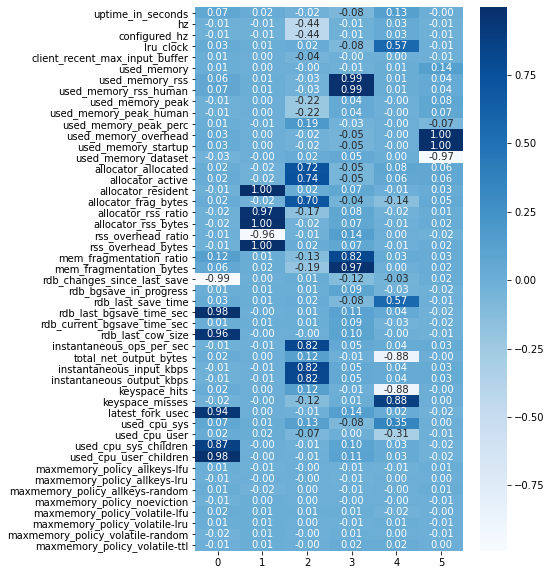

In [67]:
plt.figure(figsize=(6,10))
sns.heatmap(internalMetrics_fa, cmap="Blues", annot=True, fmt='.2f')

### 고유값

In [57]:
ev, v = fa.get_eigenvalues()
# print(pd.DataFrame(ev))

In [58]:
print(ev)

[ 5.98750676e+00  5.05658250e+00  4.63490366e+00  3.70164480e+00
  3.28508752e+00  3.05336236e+00  2.84480745e+00  2.56960027e+00
  2.04327818e+00  1.81613955e+00  1.37779477e+00  1.32971632e+00
  1.14726311e+00  1.14499077e+00  1.14389369e+00  1.14259885e+00
  1.13898441e+00  1.13789467e+00  1.13567877e+00  9.91890931e-01
  9.76136656e-01  3.09702303e-01  2.49390561e-01  2.37316774e-01
  2.05279940e-01  9.88452607e-02  8.88412264e-02  6.77211141e-02
  2.79650284e-02  2.22495764e-02  1.40059957e-02  8.07564837e-03
  4.92885145e-03  4.55418636e-03  9.51479203e-04  3.08451987e-04
  9.75900204e-05  1.00079273e-05  2.16903358e-09  3.28243065e-12
  8.40813672e-16  4.79370569e-16  1.80517729e-16 -5.83623342e-17
 -1.01135719e-16 -3.35126752e-16 -4.79321120e-16 -7.91537014e-16
 -1.86484429e-15]


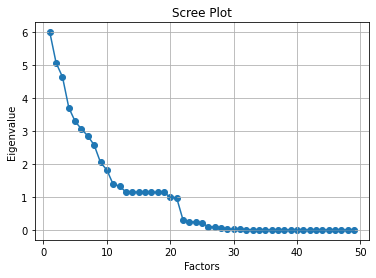

In [71]:
plt.scatter(range(1,internalMetrics_df.shape[1]+1),ev)
plt.plot(range(1,internalMetrics_df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

## Clustering

In [72]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(internalMetrics_fa)

KMeans(n_clusters=4)

In [73]:
# 결과 확인
result = internalMetrics_fa.copy()
result["cluster"] = kmeans.labels_
result.head()

,0,1,2,cluster
uptime_in_seconds,0.045627,0.007440,-0.013298,0
hz,0.004134,-0.010313,-0.432910,0
configured_hz,0.004134,-0.010313,-0.432910,0
lru_clock,0.021861,-0.014625,-0.010560,0
client_recent_max_input_buffer,0.008235,0.002180,-0.042702,0


In [38]:
# 클러스터 개수 확인
result['cluster'].value_counts()

0    39
2     5
1     4
3     1
Name: cluster, dtype: int64

In [74]:
result.columns = ['x', 'y', 'z','cluster']
result.head()

,x,y,z,cluster
uptime_in_seconds,0.045627,0.007440,-0.013298,0
hz,0.004134,-0.010313,-0.432910,0
configured_hz,0.004134,-0.010313,-0.432910,0
lru_clock,0.021861,-0.014625,-0.010560,0
client_recent_max_input_buffer,0.008235,0.002180,-0.042702,0


In [75]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [81]:
model = KMeans(n_clusters = 7)
model.fit(result)
labels = model.predict(result)

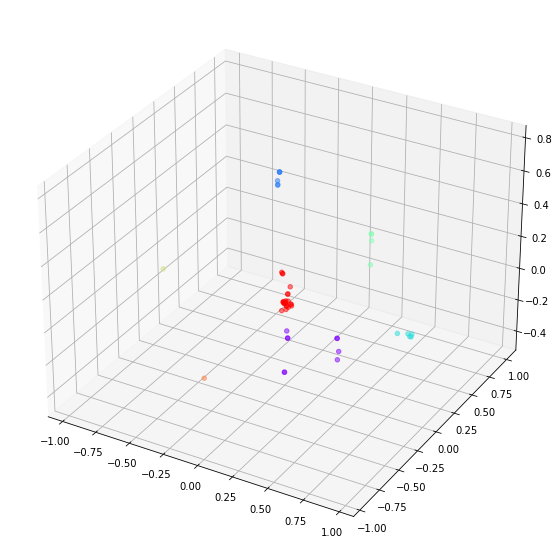

In [82]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d') 

x = result['x']
y = result['y']
z = result['z']

ax.scatter(x, y, z, c = labels, s= 20, alpha=0.5, cmap='rainbow')

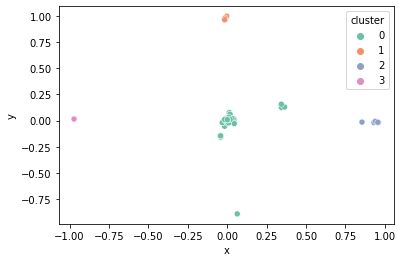

In [47]:
sns.scatterplot(x=result.columns[0], y=result.columns[1], hue="cluster", data=result, palette="Set2");

In [44]:
type(result.columns[0])

int